In [16]:
from casia_fasd import CASIAFASDDataset
from replay_attack import ReplayAttackDataset
import torch
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

import torchvision.transforms.functional as F
import torchvision.transforms as T

plt.rcParams["savefig.bbox"] = 'tight'


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [25]:
trans = T.Compose([
        T.ToPILImage(),
        T.Resize((512, 512)),
        #T.ConvertImageDtype(torch.float)
        T.ToTensor()
        ])

casia = ReplayAttackDataset("/home/raul/liveness/newds/replay-new/data/", "train",
                         transform=trans, depth_transform=trans,
                         nodepth_path="/home/raul/liveness/newds/replay-new/data/attack_depth.png")
ldr = DataLoader(casia, batch_size=16, shuffle=True)

def grid_from_batch(imgs, crops, depths, depth_crops):
    cat = torch.cat([imgs, crops, depths, depth_crops], 3)
    return make_grid(cat)

tensor([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])


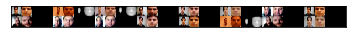

In [26]:
for imgs, crops, depths, depth_crops, labels in iter(ldr):
    print(labels)
    show(grid_from_batch(imgs, crops, depths, depth_crops))
    break